In [13]:
import pandas as pd

In [17]:
df_repo = pd.read_csv(r"data/1_repo_info.csv")

In [19]:
df_repo.head()

,repo_id,repo_owner,repo_name,created_at,project_size,num_forks,num_stars,default_branch,last_update,is_archived,repo_url,teammate
0,17165658,apache,spark,2014-02-25T08:00:08Z,488587,28487,40503,master,2025-02-10T20:44:29Z,False,https://github.com/apache/spark,helen
1,4710920,apache,dubbo,2012-06-19T07:56:02Z,59419,26459,40715,3.3,2025-02-10T15:11:41Z,False,https://github.com/apache/dubbo,helen
2,9185792,apache,echarts,2013-04-03T03:18:59Z,245106,19696,61824,master,2025-02-10T17:32:09Z,False,https://github.com/apache/echarts,helen
3,33884891,apache,airflow,2015-04-13T18:04:58Z,335686,14621,38678,main,2025-02-10T20:09:28Z,False,https://github.com/apache/airflow,helen
4,39464018,apache,superset,2015-07-21T18:55:34Z,703502,14423,64336,master,2025-02-10T19:52:42Z,False,https://github.com/apache/superset,helen


In [33]:
print(df_repo.isnull().sum())

repo_id           0
repo_owner        0
repo_name         0
created_at        0
project_size      0
num_forks         0
num_stars         0
default_branch    0
last_update       0
is_archived       0
repo_url          0
teammate          0
dtype: int64


In [35]:
print(df_repo.duplicated().sum())

0


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

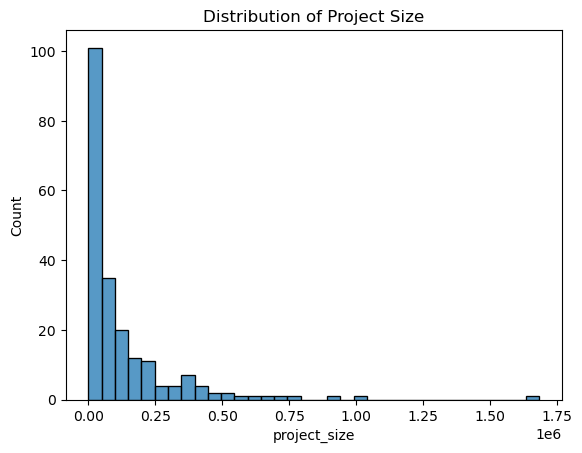

In [69]:
#Check for normality
sns.histplot(df_repo['project_size'])
plt.title("Distribution of Project Size")
plt.show()

In [71]:
df_repo['log_project_size'] = np.log1p(df_repo['project_size'])

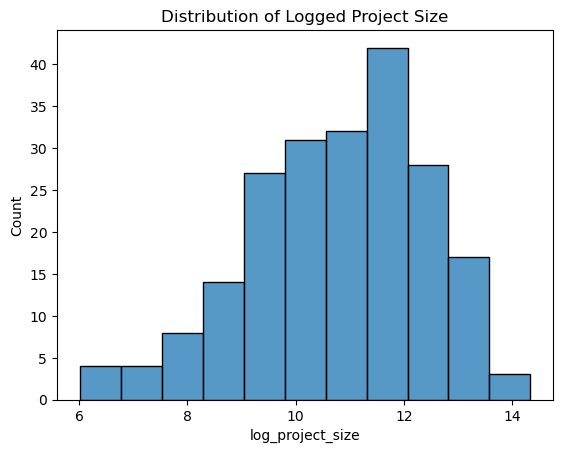

In [73]:
sns.histplot(df_repo['log_project_size'])
plt.title("Distribution of Logged Project Size")
plt.show()

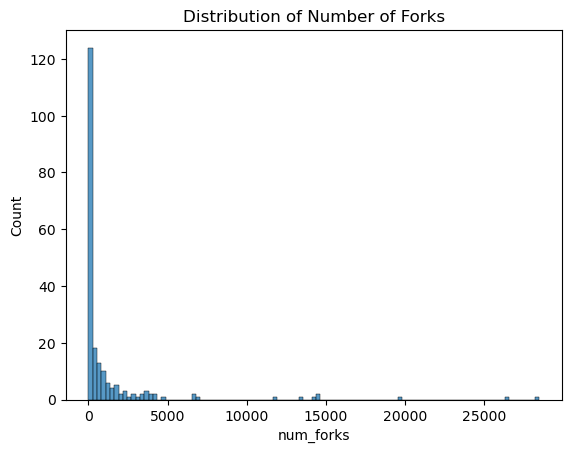

In [75]:
sns.histplot(df_repo['num_forks'])
plt.title("Distribution of Number of Forks")
plt.show()

In [77]:
df_repo['log_num_forks'] = np.log1p(df_repo['num_forks'])

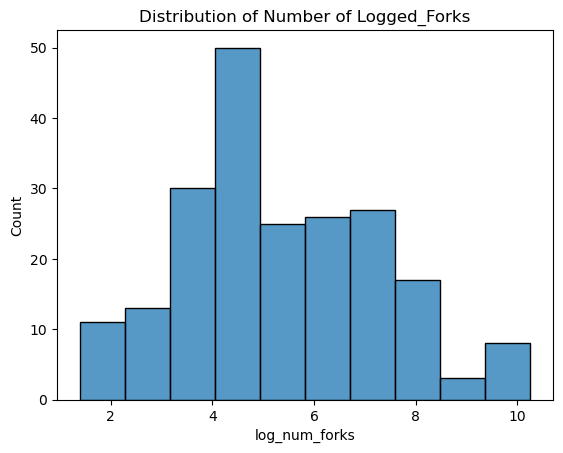

In [79]:
sns.histplot(df_repo['log_num_forks'])
plt.title("Distribution of Number of Logged_Forks")
plt.show()

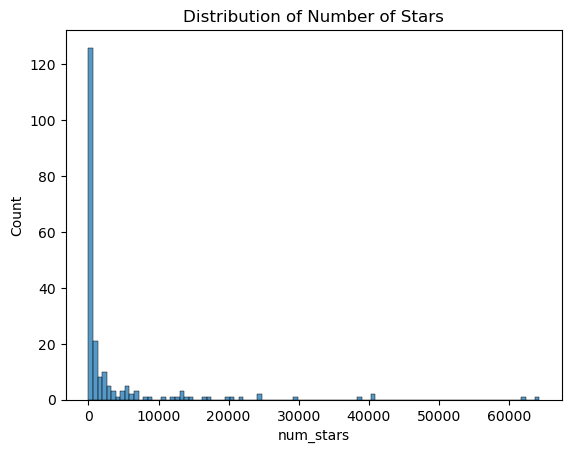

In [81]:
sns.histplot(df_repo['num_stars'])
plt.title("Distribution of Number of Stars")
plt.show()

In [83]:
df_repo['log_num_stars'] = np.log1p(df_repo['num_stars'])

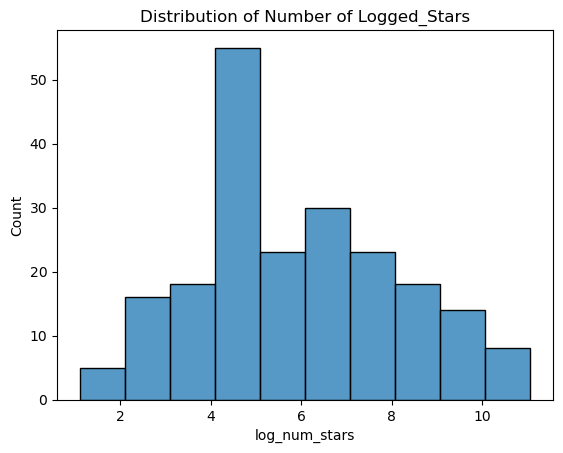

In [85]:
sns.histplot(df_repo['log_num_stars'])
plt.title("Distribution of Number of Logged_Stars")
plt.show()

In [87]:
df_repo.head()

,repo_id,repo_owner,repo_name,created_at,project_size,num_forks,num_stars,default_branch,last_update,is_archived,repo_url,teammate,log_num_forks,log_num_stars,log_project_size
0,17165658,apache,spark,2014-02-25T08:00:08Z,488587,28487,40503,master,2025-02-10T20:44:29Z,False,https://github.com/apache/spark,helen,10.257238,10.609156,13.099275
1,4710920,apache,dubbo,2012-06-19T07:56:02Z,59419,26459,40715,3.3,2025-02-10T15:11:41Z,False,https://github.com/apache/dubbo,helen,10.183389,10.614376,10.992386
2,9185792,apache,echarts,2013-04-03T03:18:59Z,245106,19696,61824,master,2025-02-10T17:32:09Z,False,https://github.com/apache/echarts,helen,9.888222,11.032063,12.409450
3,33884891,apache,airflow,2015-04-13T18:04:58Z,335686,14621,38678,main,2025-02-10T20:09:28Z,False,https://github.com/apache/airflow,helen,9.590283,10.563052,12.723934
4,39464018,apache,superset,2015-07-21T18:55:34Z,703502,14423,64336,master,2025-02-10T19:52:42Z,False,https://github.com/apache/superset,helen,9.576649,11.071890,13.463827


In [91]:
from scipy.stats import pearsonr

# Compute correlation and p-value for each pair
corr1, p1 = pearsonr(df_repo['log_project_size'], df_repo['log_num_forks'])
corr2, p2 = pearsonr(df_repo['log_project_size'], df_repo['log_num_stars'])
corr3, p3 = pearsonr(df_repo['log_num_forks'], df_repo['log_num_stars'])

# Print results
print(f"Correlation between log_project_size and log_num_forks: {corr1}, p-value: {p1}")
print(f"Correlation between log_project_size and log_num_stars: {corr2}, p-value: {p2}")
print(f"Correlation between log_num_forks and log_num_stars: {corr3}, p-value: {p3}")


Correlation between log_project_size and log_num_forks: 0.5772379484836878, p-value: 4.7019774570449874e-20
Correlation between log_project_size and log_num_stars: 0.5619676949951071, p-value: 7.028054942197149e-19
Correlation between log_num_forks and log_num_stars: 0.9712318797536539, p-value: 1.3628748817195124e-131
